Import some libraries we'll need later:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

Loading Iris dataset: This data consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). It has four features from each sample: length and width of sepals and petals.

In [2]:
iris = datasets.load_iris()

In [3]:
#iris.target

In [4]:
iris.data.shape

(150, 4)

In [5]:
# Checking the features
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
# scale
from sklearn.preprocessing import StandardScaler
# Create a StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
iris_scaled = scaler.fit_transform(iris.data)

In [7]:
df = pd.DataFrame(iris_scaled, columns=iris.feature_names) # or if we don't want to work with scaled data:
#df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(10) #df ("dataframe") (dot) head() gives us the HEAD of the dataframe - aka the top 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
5,-0.537178,1.939791,-1.169714,-1.052180
6,-1.506521,0.788808,-1.340227,-1.183812
7,-1.021849,0.788808,-1.283389,-1.315444
8,-1.748856,-0.362176,-1.340227,-1.315444
9,-1.143017,0.098217,-1.283389,-1.447076


We want the data itself to group and tell us what the major groups are - we are going to use a technique called "clustering" (or k-means clustering, where k= the number of clusters). I don't know in advance what the best number of clusters will be, so I will try a bunch of different k (k= 2,3,5) and then see how well our clusters are performing. See below :)

## We load our model:

In [9]:
from sklearn.cluster import KMeans

## We train our model:

In [ ]:
help(KMeans)

In [10]:
# Create kmeans object
#k = 5 training model
km = KMeans(n_clusters=5)
%time km.fit(df)
clusters = km.labels_.tolist()
silhouette_k5 = silhouette_score(df[0:200], clusters[0:200])

CPU times: user 54.2 ms, sys: 6.95 ms, total: 61.2 ms
Wall time: 76.6 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
# Create kmeans object
#k = 5 training model
km = KMeans(n_clusters=4)
%time km.fit(df)
clusters = km.labels_.tolist()
silhouette_k4 = silhouette_score(df[0:200], clusters[0:200])

CPU times: user 45 ms, sys: 0 ns, total: 45 ms
Wall time: 41.4 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
#k = 3 training model
km = KMeans(n_clusters=3)
%time km.fit(df)
clusters = km.labels_.tolist()
silhouette_k3 = silhouette_score(df[0:200], clusters[0:200])

CPU times: user 29.3 ms, sys: 316 µs, total: 29.6 ms
Wall time: 20.5 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
#k = 2 training model
km = KMeans(n_clusters=2)
%time km.fit(df)
clusters = km.labels_.tolist()
silhouette_k2 = silhouette_score(df[0:200], clusters[0:200])

CPU times: user 23.4 ms, sys: 0 ns, total: 23.4 ms
Wall time: 16.9 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## We evaluate our model:

Ok now that we've trained 4 models on different size clusters (different k) and we calculated a silhouette coefficient - The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
We can plot the number of clusters by the silhouette score and use the elbow method (visually looking at the data to see where's an "elbow") to see which cluster does the best. **The Elbow method** is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.

In [14]:
silhouette = [silhouette_k2, silhouette_k3, silhouette_k3, silhouette_k5]
count_k = [2, 3, 4, 5]

count_silhouette = list(zip(count_k, silhouette))
print(count_silhouette)

[(2, 0.5817500491982808), (3, 0.45994823920518635), (4, 0.45994823920518635), (5, 0.34551099599809465)]


In [27]:
silhouette

[0.5817500491982808,
 0.45994823920518635,
 0.45994823920518635,
 0.34551099599809465]

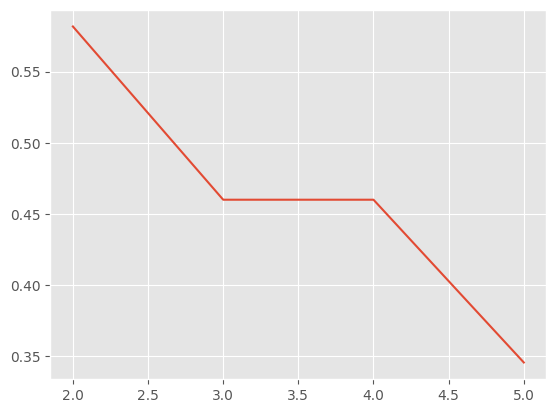

In [15]:
plt.plot(*zip(*count_silhouette))

From this plot - I am going to go with k=3 being the "elbow" of the data.

In [16]:
km = KMeans(n_clusters=3)
%time km.fit(df)
clusters3 = km.labels_.tolist()
silhouette_k3 = silhouette_score(df[0:50000], clusters[0:50000])

CPU times: user 30.2 ms, sys: 742 µs, total: 31 ms
Wall time: 21.2 ms


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [17]:
#Let's assign these clusters back to the original df and take a look!
df.loc[:, "cluster_number"] = clusters3

In [18]:
df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_number
0,-0.900681,1.019004,-1.340227,-1.315444,2
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,2
5,-0.537178,1.939791,-1.169714,-1.052180,2
6,-1.506521,0.788808,-1.340227,-1.183812,2
7,-1.021849,0.788808,-1.283389,-1.315444,2
8,-1.748856,-0.362176,-1.340227,-1.315444,2
9,-1.143017,0.098217,-1.283389,-1.447076,2


In [19]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster_number
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,1
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0
149,0.068662,-0.131979,0.762758,0.790671,1


In [20]:
#it is important to investigate how many samples are in each of your clusters - we can seee here that the
#class 1 has almost double the size of class 2.
df["cluster_number"].value_counts()

1    53
2    50
0    47
Name: cluster_number, dtype: int64

### Let´s see how our dataset looks before and after clustering. I´ll choose two print with regards to the features Petal Length and Petal Width.

In [21]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'cluster_number'],
      dtype='object')

In [22]:
# accessing petal length column:
df['petal length (cm)']

0     -1.340227
1     -1.340227
2     -1.397064
3     -1.283389
4     -1.340227
         ...   
145    0.819596
146    0.705921
147    0.819596
148    0.933271
149    0.762758
Name: petal length (cm), Length: 150, dtype: float64

In [23]:
# accessing Petal Width column:
df['petal width (cm)']

0     -1.315444
1     -1.315444
2     -1.315444
3     -1.315444
4     -1.315444
         ...   
145    1.448832
146    0.922303
147    1.053935
148    1.448832
149    0.790671
Name: petal width (cm), Length: 150, dtype: float64

Text(0.5, 1.0, 'The actual dataset')

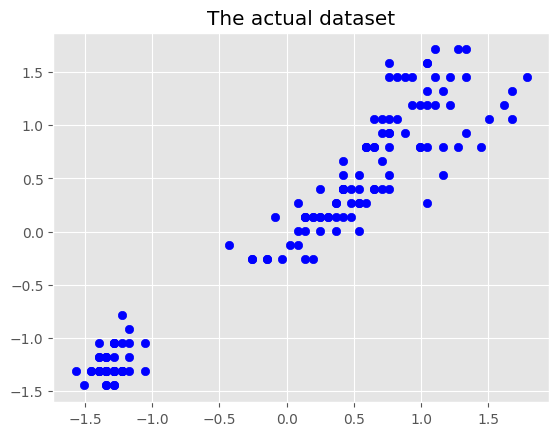

In [24]:
# Let´s plot this two! :)
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],color='b')
plt.title("The actual dataset")

Text(0.5, 1.0, 'The dataset original clustering')

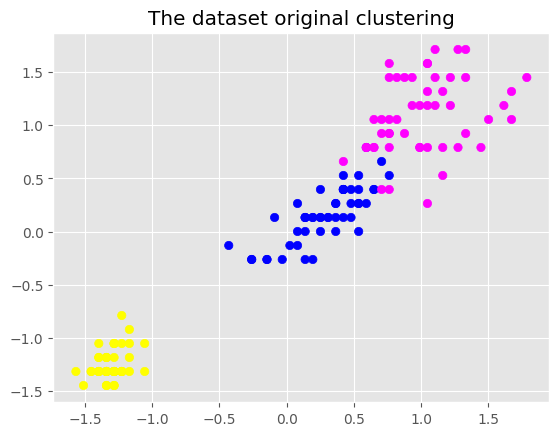

In [26]:
# now let´s prepare the color for our plot with the cluster:
color =np.array(['yellow','blue','magenta'])
# .ravel(): This is a NumPy function that converts a multi-dimensional array into a flattened 1D array. In this case, it is used to flatten the target variable.
plt.scatter(x=df['petal length (cm)'],y=df['petal width (cm)'],c=color[iris.target.ravel()])
plt.title("The dataset original clustering")